In [176]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [177]:
#LEt us check the column header of boston data set
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [178]:
#Let us check the boston dataset shape
print(load_boston().data.shape)

(506, 13)


In [179]:
X = load_boston().data
Y = load_boston().target

In [189]:
df=pd.DataFrame(X)

In [190]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [182]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [183]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
clf = SGDRegressor(learning_rate='constant',eta0=0.01,n_iter=100,max_iter=100)
clf.fit(X, Y)
mse_sgd = mean_squared_error(Y, clf.predict(X))
print(mean_squared_error(Y, clf.predict(X)))

23.19656403774602


Text(0.5, 1.0, 'Actual price Vs Predicted price')

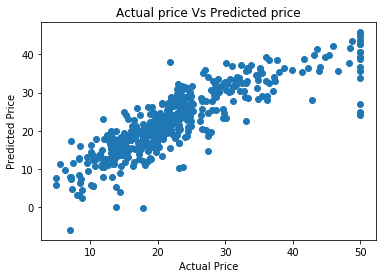

In [184]:
plt.scatter(Y,clf.predict(X))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price Vs Predicted price')


In [192]:
df['price']=Y

In [193]:
#SGD implementation for linear regression
# we will implement the equation and find the weight vector

W=np.zeros(shape=(1,13))
B=0
iteration =100
learn_rate =0.01
k=25

while iteration>=0:
    w=W
    b=B
    vector=np.zeros(shape=(1,13))
    intercept=0
    data= df.sample(30)
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    for i in range(k):
        vector+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b)) # partial differentation explained in te video(dl/dw)
        intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))
        
        W=(w-learn_rate*(vector)/k)
        B=(b-learn_rate*(intercept)/k)
        iteration-=1
print(W)
print(B)



[[-0.22739945  0.32442225 -0.23317685  0.21461886 -0.21092977  0.22168193
  -0.17577685  0.16375659 -0.4069626  -0.44852646 -0.29069344  0.25102612
  -0.2843854 ]]
[1.98578249]


In [194]:
y_predict=[]
for i in range(len(X)):
    Y_hat=np.dot(W,X[i])+B
    y_predict.append(np.asscalar(Y_hat))

Text(0.5, 1.0, 'Actual price Vs Predicted price')

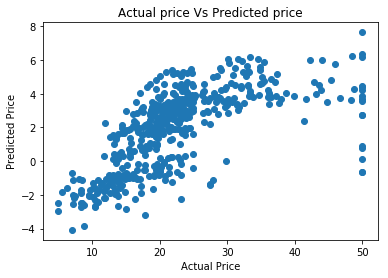

In [195]:
plt.scatter(Y,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price Vs Predicted price')


In [196]:
MSE_reg = mean_squared_error(Y,y_predict)
print('MEan squared error obtained in linear regression implementation=',MSE_reg)

MEan squared error obtained in linear regression implementation= 484.16478976191


In [197]:
from prettytable import PrettyTable
tab= PrettyTable()
tab.field_names=['Weight Vector manual','Weight vector SGD SKLEARN']
weight_sgd=clf.coef_
for i in range(13):
    tab.add_row([W[0][i],weight_sgd[i]])
print(tab)

+----------------------+---------------------------+
| Weight Vector manual | Weight vector SGD SKLEARN |
+----------------------+---------------------------+
| -0.2273994494162701  |    -0.9602188479613879    |
|   0.32442225443218   |     0.7821540095314731    |
| -0.23317685158044857 |    0.07631143327302752    |
| 0.21461885939264647  |     0.9555552226153885    |
| -0.21092976514467332 |    -1.7551215708761376    |
| 0.22168193401505293  |     2.550780217427071     |
| -0.17577685203032803 |     0.2724425835592661    |
| 0.16375659033798462  |    -3.5334977998591905    |
| -0.4069625979805738  |      2.36150686407776     |
| -0.4485264586482895  |     -2.342971355890155    |
| -0.29069343867736436 |    -2.6136235753534263    |
| 0.25102611743402337  |     1.0724911508703718    |
| -0.2843853996051507  |     -4.019421762964762    |
+----------------------+---------------------------+


In [198]:
print('MSE of manual implementation=',MSE_reg)
print('--'*50)
print('MSE of SGD SKLEARN implementation=',mse_sgd)
print('--'*50)

MSE of manual implementation= 484.16478976191
----------------------------------------------------------------------------------------------------
MSE of SGD SKLEARN implementation= 23.19656403774602
----------------------------------------------------------------------------------------------------


In [199]:
clf = SGDRegressor(learning_rate='constant',eta0=0.01,n_iter=1000,max_iter=1000)
clf.fit(X, Y)
mse_sgd= mean_squared_error(Y, clf.predict(X))
print(mean_squared_error(Y, clf.predict(X)))

22.907173722202067


Text(0.5, 1.0, 'Actual price Vs Predicted price')

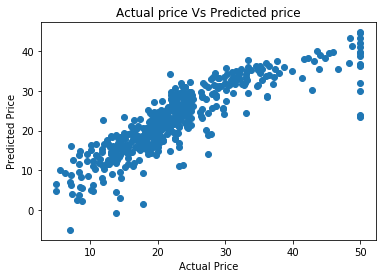

In [200]:
plt.scatter(Y,clf.predict(X))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price Vs Predicted price')


In [201]:
#SGD implementation for linear regression
# we will implement the equation and find the weight vector

W=np.zeros(shape=(1,13))
B=0
iteration =1000
learn_rate =0.01
k=30

while iteration>=0:
    w=W
    b=B
    vector=np.zeros(shape=(1,13))
    intercept=0
    data= df.sample(30)
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    for i in range(k):
        vector+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b)) # partial differentation explained in te video(dl/dw)
        intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))
        
        W=(w-learn_rate*(vector)/k)
        B=(b-learn_rate*(intercept)/k)
        iteration-=1
print(W)
print(B)



[[-0.93389797  0.08320225 -0.79451437  0.46676044 -0.42734109  1.46898527
  -0.34878196 -0.44644072 -0.31206775 -0.64512105 -1.03535731  0.77064265
  -1.64129681]]
[11.12423153]


In [202]:
y_predict=[]
for i in range(len(X)):
    Y_hat=np.dot(W,X[i])+B
    y_predict.append(np.asscalar(Y_hat))

Text(0.5, 1.0, 'Actual price Vs Predicted price')

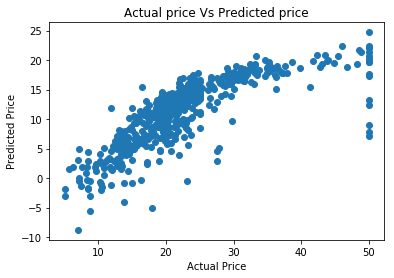

In [203]:
plt.scatter(Y,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price Vs Predicted price')


In [204]:
MSE_reg = mean_squared_error(Y,y_predict)
print('MEan squared error obtained in linear regression implementation=',MSE_reg)

MEan squared error obtained in linear regression implementation= 164.73347006443598


In [205]:
from prettytable import PrettyTable
tab= PrettyTable()
tab.field_names=['Weight Vector manual','Weight vector SGD SKLEARN']
weight_sgd=clf.coef_
for i in range(13):
    tab.add_row([W[0][i],weight_sgd[i]])
print(tab)

+----------------------+---------------------------+
| Weight Vector manual | Weight vector SGD SKLEARN |
+----------------------+---------------------------+
| -0.9338979703538736  |    -0.9658392087709343    |
|  0.0832022518871465  |     1.2293440002363007    |
| -0.7945143737679866  |    -0.07330382234661445   |
|  0.4667604385812626  |     0.3132399073145978    |
| -0.42734109324289477 |    -2.1904348012664157    |
|  1.468985274696729   |     2.429518874703924     |
|  -0.348781964612902  |     0.0489168162017408    |
| -0.44644072187290756 |     -2.968794594936996    |
| -0.3120677475365256  |     2.5006284669282386    |
| -0.6451210500974637  |    -2.3276417622471817    |
| -1.0353573116158117  |    -2.2002482155642005    |
|  0.7706426492499777  |     0.562304156084621     |
| -1.6412968054718622  |    -3.9804940903624093    |
+----------------------+---------------------------+


In [206]:
print('MSE of manual implementation=',MSE_reg)
print('--'*50)
print('MSE of SGD SKLEARN implementation=',mse_sgd)
print('--'*50)

MSE of manual implementation= 164.73347006443598
----------------------------------------------------------------------------------------------------
MSE of SGD SKLEARN implementation= 22.907173722202067
----------------------------------------------------------------------------------------------------


In [207]:
clf = SGDRegressor(learning_rate='constant',eta0=0.01,n_iter=10000,max_iter=10000)
clf.fit(X, Y)
mse_sgd= mean_squared_error(Y, clf.predict(X))
print(mean_squared_error(Y, clf.predict(X)))

22.76358510445017


Text(0.5, 1.0, 'Actual price Vs Predicted price')

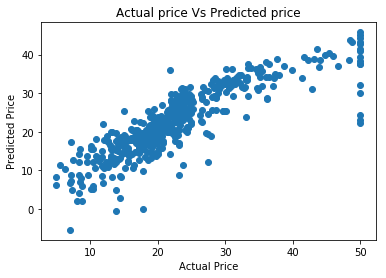

In [208]:
plt.scatter(Y,clf.predict(X))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price Vs Predicted price')


In [209]:
#SGD implementation for linear regression
# we will implement the equation and find the weight vector

W=np.zeros(shape=(1,13))
B=0
iteration =10000
learn_rate =0.01
k=30

while iteration>=0:
    w=W
    b=B
    vector=np.zeros(shape=(1,13))
    intercept=0
    data= df.sample(30)
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    for i in range(k):
        vector+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b)) # partial differentation explained in te video(dl/dw)
        intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))
        
        W=(w-learn_rate*(vector)/k)
        B=(b-learn_rate*(intercept)/k)
        iteration-=1
print(W)
print(B)



[[-0.72875383  0.77196977 -0.17223858  0.76861899 -1.36493877  2.90033014
   0.07823984 -2.29471835  1.15660213 -0.7222612  -1.96920691  0.96638984
  -3.88729116]]
[22.55416783]


In [210]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.asscalar.html
y_predict=[]
for i in range(len(X)):
    Y_hat=np.dot(W,X[i])+B
    y_predict.append(np.asscalar(Y_hat))

Text(0.5, 1.0, 'Actual price Vs Predicted price')

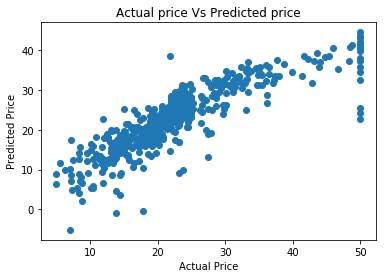

In [211]:
plt.scatter(Y,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price Vs Predicted price')


In [212]:
MSE_reg = mean_squared_error(Y,y_predict)
print('MEan squared error obtained in linear regression implementation=',MSE_reg)

MEan squared error obtained in linear regression implementation= 22.46635704700673


In [213]:
from prettytable import PrettyTable
tab= PrettyTable()
tab.field_names=['Weight Vector manual','Weight vector SGD SKLEARN']
weight_sgd=clf.coef_
for i in range(13):
    tab.add_row([W[0][i],weight_sgd[i]])
print(tab)

+----------------------+---------------------------+
| Weight Vector manual | Weight vector SGD SKLEARN |
+----------------------+---------------------------+
| -0.7287538253845234  |    -0.7909326304791491    |
|  0.7719697698033061  |     1.0098173825749714    |
| -0.17223858328700467 |    -0.1198466843809395    |
|  0.7686189878604841  |     0.1170164704878835    |
| -1.3649387675037044  |    -1.9980362298651373    |
|  2.900330139859786   |     3.0425799986295745    |
| 0.07823984118513992  |    -0.2574143639769527    |
| -2.2947183518341365  |    -3.3247096135298553    |
|   1.15660213352372   |     2.5894479760929854    |
| -0.7222612025239594  |     -2.160662516627998    |
| -1.9692069132613657  |    -2.3857447330292576    |
|  0.9663898365951545  |     0.953514147417997     |
| -3.8872911643376065  |    -3.7131810538670194    |
+----------------------+---------------------------+


In [214]:
print('MSE of manual implementation=',MSE_reg)
print('--'*50)
print('MSE of SGD SKLEARN implementation=',mse_sgd)
print('--'*50)

MSE of manual implementation= 22.46635704700673
----------------------------------------------------------------------------------------------------
MSE of SGD SKLEARN implementation= 22.76358510445017
----------------------------------------------------------------------------------------------------


# Observation

1. We imported boston house price dataset and implemented column standardization.
2. Then, we implemented the SGD regressor from SKlearn.These implementation was carried out by increasing the number of iteration from 100 to 10,000.
3. On the same data, we implemented the SGD regressor manually (by applying the partial differentation equation w.r.t W and B). These implementation also with iteration from 100 to 10,000.
4. We calcuated the weights on both the implementation and also calculated the mean square error.
5. It is observed that the by increasing the number of iteration, manual implemented SGD regressor started to behave similar to SGD regressor of SKLEARN.
